<a href="https://colab.research.google.com/github/aghnisyaa/bioactivity_project/blob/main/real_CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [1]:
! python --version

Python 3.10.12


In [8]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-11-30 02:29:56--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   201MB/s    in 0.4s    

2024-11-30 02:29:57 (201 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
 

## **Load bioactivity data**

In [9]:
import pandas as pd

In [17]:
df = pd.read_csv('bioactivity_data_preprocessed.csv')
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL575429,O=C(O)/C=C/c1ccc(OS(=O)(=O)O)cc1,inactive,2000000.0
1,CHEMBL574855,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc(O)cc1,inactive,2000000.0
2,CHEMBL574190,CCN(CCCN(CC)C(=O)c1ccc(O)cc1)C(=O)c1ccc(O)cc1,inactive,2000000.0
3,CHEMBL575724,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc2cc(O)cc...,inactive,294000.0
4,CHEMBL582943,CCN(CCOC(=O)/C=C/c1ccc(O)cc1)Cc1cc(Cl)ccc1O,inactive,46000.0
...,...,...,...,...
64,CHEMBL495739,Cl.O=S(=O)(NCCNC/C=C/c1ccc(Br)cc1)c1cccc2cnccc12,active,960.0
65,CHEMBL5170343,O=C(O)/C=C/C#CCCCCCCCC(=O)O,intermediate,2500.0
66,CHEMBL251279,CCCCC#CC#CC#CCCCCCCCC(=O)O,intermediate,2700.0
67,CHEMBL2204412,CCCC/C=C/C#CC#CCCCCCCCC(=O)O,intermediate,2200.0


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [11]:
!pip install rdkit-pypi


In [12]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [13]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [18]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,244.224,0.9660,2.0,4.0
1,385.464,1.9696,4.0,5.0
2,370.449,3.1123,2.0,4.0
3,435.524,3.1228,4.0,5.0
4,375.852,3.8297,2.0,5.0
...,...,...,...,...
64,482.831,4.0004,2.0,4.0
65,238.283,2.4459,2.0,2.0
66,272.388,4.0021,1.0,1.0
67,274.404,4.5549,1.0,1.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [15]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,244.224,0.9660,2.0,4.0
1,385.464,1.9696,4.0,5.0
2,370.449,3.1123,2.0,4.0
3,435.524,3.1228,4.0,5.0
4,375.852,3.8297,2.0,5.0
...,...,...,...,...
64,482.831,4.0004,2.0,4.0
65,238.283,2.4459,2.0,2.0
66,272.388,4.0021,1.0,1.0
67,274.404,4.5549,1.0,1.0


In [16]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL575429,O=C(O)/C=C/c1ccc(OS(=O)(=O)O)cc1,inactive,2000000.0
1,CHEMBL574855,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc(O)cc1,inactive,2000000.0
2,CHEMBL574190,CCN(CCCN(CC)C(=O)c1ccc(O)cc1)C(=O)c1ccc(O)cc1,inactive,2000000.0
3,CHEMBL575724,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc2cc(O)cc...,inactive,294000.0
4,CHEMBL582943,CCN(CCOC(=O)/C=C/c1ccc(O)cc1)Cc1cc(Cl)ccc1O,inactive,46000.0
...,...,...,...,...
64,CHEMBL495739,Cl.O=S(=O)(NCCNC/C=C/c1ccc(Br)cc1)c1cccc2cnccc12,active,960.0
65,CHEMBL5170343,O=C(O)/C=C/C#CCCCCCCCC(=O)O,intermediate,2500.0
66,CHEMBL251279,CCCCC#CC#CC#CCCCCCCCC(=O)O,intermediate,2700.0
67,CHEMBL2204412,CCCC/C=C/C#CC#CCCCCCCCC(=O)O,intermediate,2200.0


Now, let's combine the 2 DataFrame

In [19]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [20]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL575429,O=C(O)/C=C/c1ccc(OS(=O)(=O)O)cc1,inactive,2000000.0,244.224,0.9660,2.0,4.0
1,CHEMBL574855,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc(O)cc1,inactive,2000000.0,385.464,1.9696,4.0,5.0
2,CHEMBL574190,CCN(CCCN(CC)C(=O)c1ccc(O)cc1)C(=O)c1ccc(O)cc1,inactive,2000000.0,370.449,3.1123,2.0,4.0
3,CHEMBL575724,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc2cc(O)cc...,inactive,294000.0,435.524,3.1228,4.0,5.0
4,CHEMBL582943,CCN(CCOC(=O)/C=C/c1ccc(O)cc1)Cc1cc(Cl)ccc1O,inactive,46000.0,375.852,3.8297,2.0,5.0
...,...,...,...,...,...,...,...,...
64,CHEMBL495739,Cl.O=S(=O)(NCCNC/C=C/c1ccc(Br)cc1)c1cccc2cnccc12,active,960.0,482.831,4.0004,2.0,4.0
65,CHEMBL5170343,O=C(O)/C=C/C#CCCCCCCCC(=O)O,intermediate,2500.0,238.283,2.4459,2.0,2.0
66,CHEMBL251279,CCCCC#CC#CC#CCCCCCCCC(=O)O,intermediate,2700.0,272.388,4.0021,1.0,1.0
67,CHEMBL2204412,CCCC/C=C/C#CC#CCCCCCCCC(=O)O,intermediate,2200.0,274.404,4.5549,1.0,1.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [31]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i * (10**-9)  # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)  # Use axis=1 to drop the column

    return x




Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [32]:
df_combined.standard_value.describe()

,standard_value
count,6.900000e+01
mean,1.016839e+05
std,4.101740e+05
min,7.200000e+00
25%,1.040000e+03
50%,2.700000e+03
75%,7.100000e+03
max,2.000000e+06


In [33]:
-np.log10( (10**-9)* 100000000 )

1.0

In [35]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [36]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)  # Use axis=1 to drop the column

    return x



We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [37]:
df_norm = norm_value(df_combined)
df_norm


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL575429,O=C(O)/C=C/c1ccc(OS(=O)(=O)O)cc1,inactive,244.224,0.9660,2.0,4.0,2000000.0
1,CHEMBL574855,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc(O)cc1,inactive,385.464,1.9696,4.0,5.0,2000000.0
2,CHEMBL574190,CCN(CCCN(CC)C(=O)c1ccc(O)cc1)C(=O)c1ccc(O)cc1,inactive,370.449,3.1123,2.0,4.0,2000000.0
3,CHEMBL575724,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc2cc(O)cc...,inactive,435.524,3.1228,4.0,5.0,294000.0
4,CHEMBL582943,CCN(CCOC(=O)/C=C/c1ccc(O)cc1)Cc1cc(Cl)ccc1O,inactive,375.852,3.8297,2.0,5.0,46000.0
...,...,...,...,...,...,...,...,...
64,CHEMBL495739,Cl.O=S(=O)(NCCNC/C=C/c1ccc(Br)cc1)c1cccc2cnccc12,active,482.831,4.0004,2.0,4.0,960.0
65,CHEMBL5170343,O=C(O)/C=C/C#CCCCCCCCC(=O)O,intermediate,238.283,2.4459,2.0,2.0,2500.0
66,CHEMBL251279,CCCCC#CC#CC#CCCCCCCCC(=O)O,intermediate,272.388,4.0021,1.0,1.0,2700.0
67,CHEMBL2204412,CCCC/C=C/C#CC#CCCCCCCCC(=O)O,intermediate,274.404,4.5549,1.0,1.0,2200.0


In [38]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,6.900000e+01
mean,1.016839e+05
std,4.101740e+05
min,7.200000e+00
25%,1.040000e+03
50%,2.700000e+03
75%,7.100000e+03
max,2.000000e+06


In [39]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL575429,O=C(O)/C=C/c1ccc(OS(=O)(=O)O)cc1,inactive,244.224,0.9660,2.0,4.0,2.698970
1,CHEMBL574855,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc(O)cc1,inactive,385.464,1.9696,4.0,5.0,2.698970
2,CHEMBL574190,CCN(CCCN(CC)C(=O)c1ccc(O)cc1)C(=O)c1ccc(O)cc1,inactive,370.449,3.1123,2.0,4.0,2.698970
3,CHEMBL575724,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc2cc(O)cc...,inactive,435.524,3.1228,4.0,5.0,3.531653
4,CHEMBL582943,CCN(CCOC(=O)/C=C/c1ccc(O)cc1)Cc1cc(Cl)ccc1O,inactive,375.852,3.8297,2.0,5.0,4.337242
...,...,...,...,...,...,...,...,...
64,CHEMBL495739,Cl.O=S(=O)(NCCNC/C=C/c1ccc(Br)cc1)c1cccc2cnccc12,active,482.831,4.0004,2.0,4.0,6.017729
65,CHEMBL5170343,O=C(O)/C=C/C#CCCCCCCCC(=O)O,intermediate,238.283,2.4459,2.0,2.0,5.602060
66,CHEMBL251279,CCCCC#CC#CC#CCCCCCCCC(=O)O,intermediate,272.388,4.0021,1.0,1.0,5.568636
67,CHEMBL2204412,CCCC/C=C/C#CC#CCCCCCCCC(=O)O,intermediate,274.404,4.5549,1.0,1.0,5.657577


In [40]:
df_final.pIC50.describe()

,pIC50
count,69.000000
mean,5.476502
std,1.033198
min,2.698970
25%,5.148742
50%,5.568636
75%,5.982967
max,8.142668


In [47]:
df_final.to_csv('dengue_virus_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [41]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL575429,O=C(O)/C=C/c1ccc(OS(=O)(=O)O)cc1,inactive,244.224,0.96600,2.0,4.0,2.698970
1,CHEMBL574855,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc(O)cc1,inactive,385.464,1.96960,4.0,5.0,2.698970
2,CHEMBL574190,CCN(CCCN(CC)C(=O)c1ccc(O)cc1)C(=O)c1ccc(O)cc1,inactive,370.449,3.11230,2.0,4.0,2.698970
3,CHEMBL575724,CN(CCCNC(=O)c1ccc(O)cc1)CCCNC(=O)c1ccc2cc(O)cc...,inactive,435.524,3.12280,4.0,5.0,3.531653
4,CHEMBL582943,CCN(CCOC(=O)/C=C/c1ccc(O)cc1)Cc1cc(Cl)ccc1O,inactive,375.852,3.82970,2.0,5.0,4.337242
6,CHEMBL311226,O[C@H]1[C@H](O)[C@@H](O)CN2CC[C@H](O)[C@H]12,active,189.211,-2.48210,4.0,5.0,6.000000
15,CHEMBL3604362,Nc1ncc(F)c2c1ncn2[C@@H]1C=C(CCO)[C@@H](O)[C@H]1O,inactive,294.286,-0.26210,4.0,7.0,4.823909
16,CHEMBL3603846,Cc1cnc(N)c2ncn([C@@H]3C=C(CO)[C@@H](O)[C@H]3O)c12,inactive,276.296,-0.48288,4.0,7.0,3.642065
19,CHEMBL2348373,CC(C)(C)C(=O)N(CCCCCCN1C[C@H](O)[C@@H](O)[C@H]...,active,442.641,1.90350,4.0,6.0,7.154902
24,CHEMBL2348373,CC(C)(C)C(=O)N(CCCCCCN1C[C@H](O)[C@@H](O)[C@H]...,active,442.641,1.90350,4.0,6.0,6.221849


In [46]:
df_2class.to_csv('dengue_virus_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [48]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

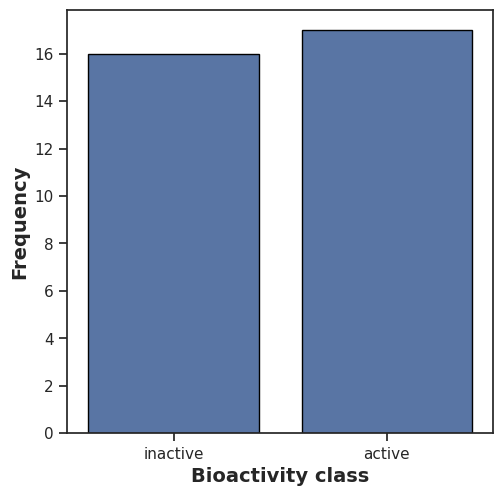

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

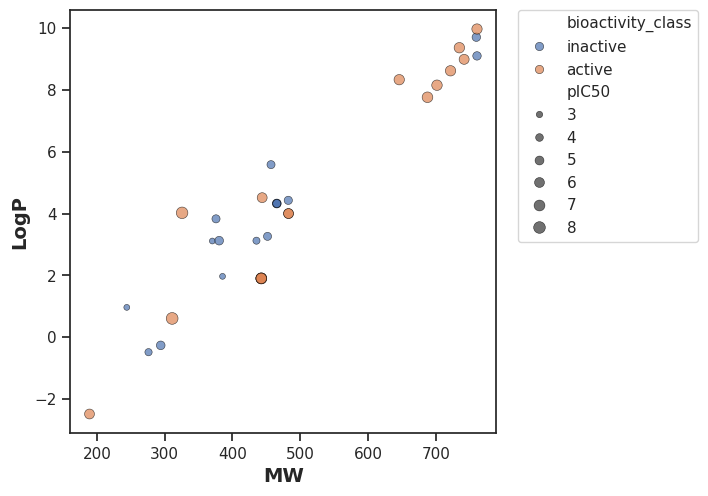

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

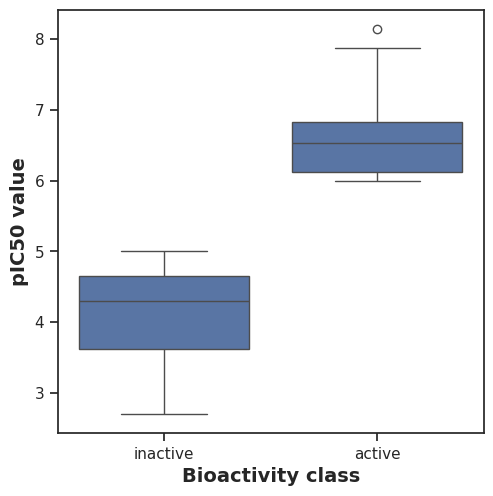

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [52]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [53]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,272.0,0.000001,0.05,Different distribution (reject H0)


#### **MW**

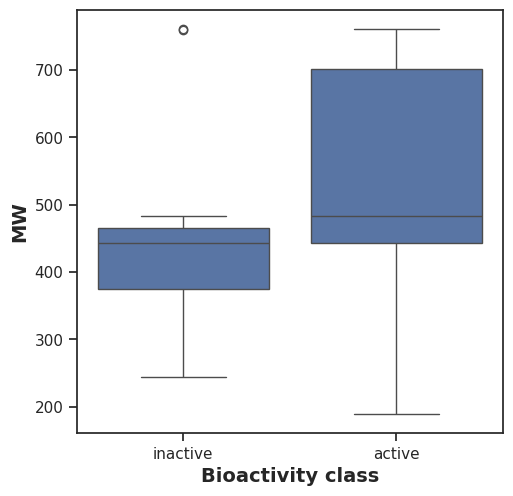

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [55]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,173.0,0.188023,0.05,Same distribution (fail to reject H0)


#### **LogP**

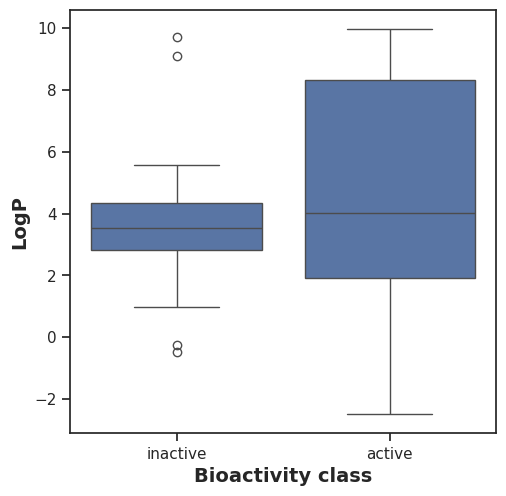

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [57]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,155.0,0.504618,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

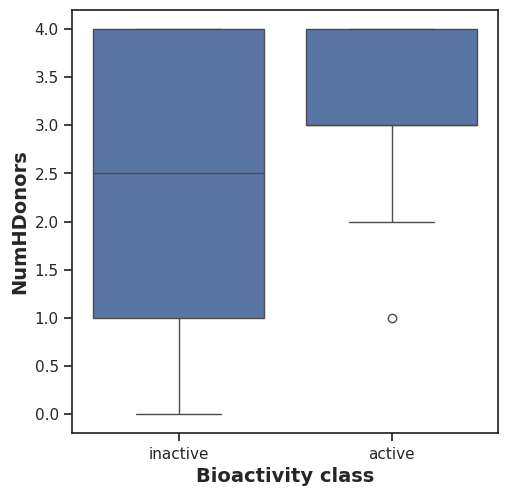

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [59]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,161.0,0.353672,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

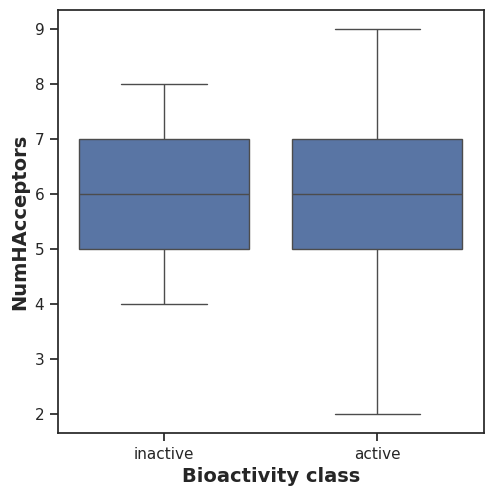

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [61]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,143.0,0.811183,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [62]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: dengue_05_bioactivity_data_2class_pIC50.csv (deflated 70%)
  adding: bioactivity_data_preprocessed.csv (deflated 80%)
  adding: dengue_virus_05_bioactivity_data_2class_pIC50.csv (deflated 70%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: plot_NumHAcceptors.pdf (deflated 36%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: plot_MW_vs_LogP.pdf (deflated 24%)
  adding: dengue_virus_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
